In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
data = pd.read_csv('Concrete Compressive Strength.csv')


In [ ]:
print(data.head())
print(data.info())


   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

In [ ]:
print(data.describe())


       Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                

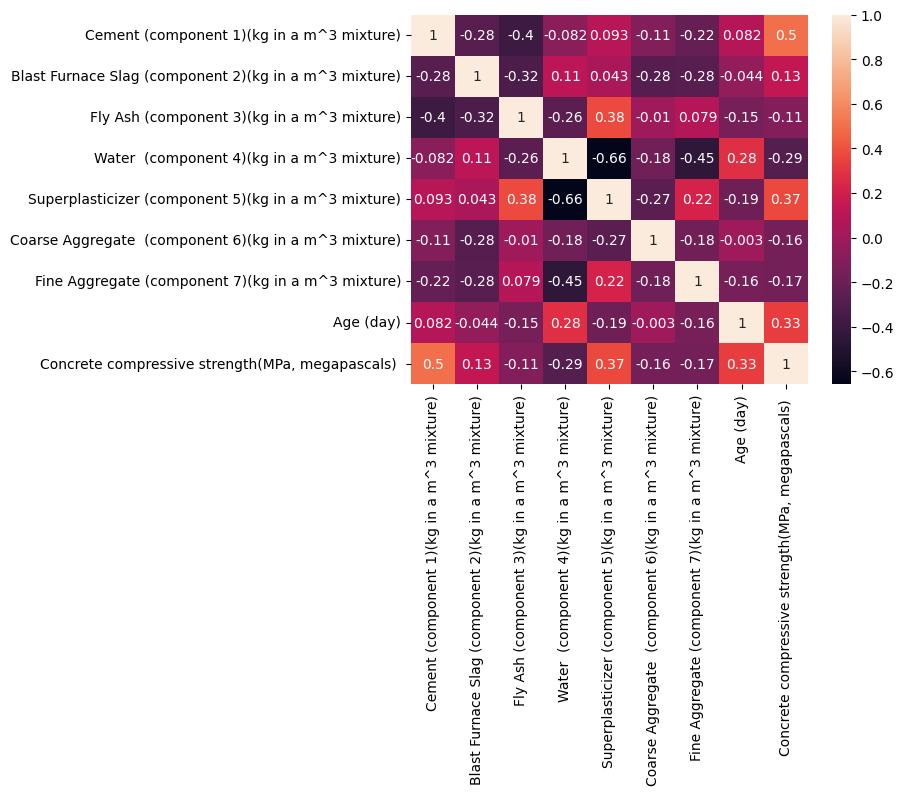

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


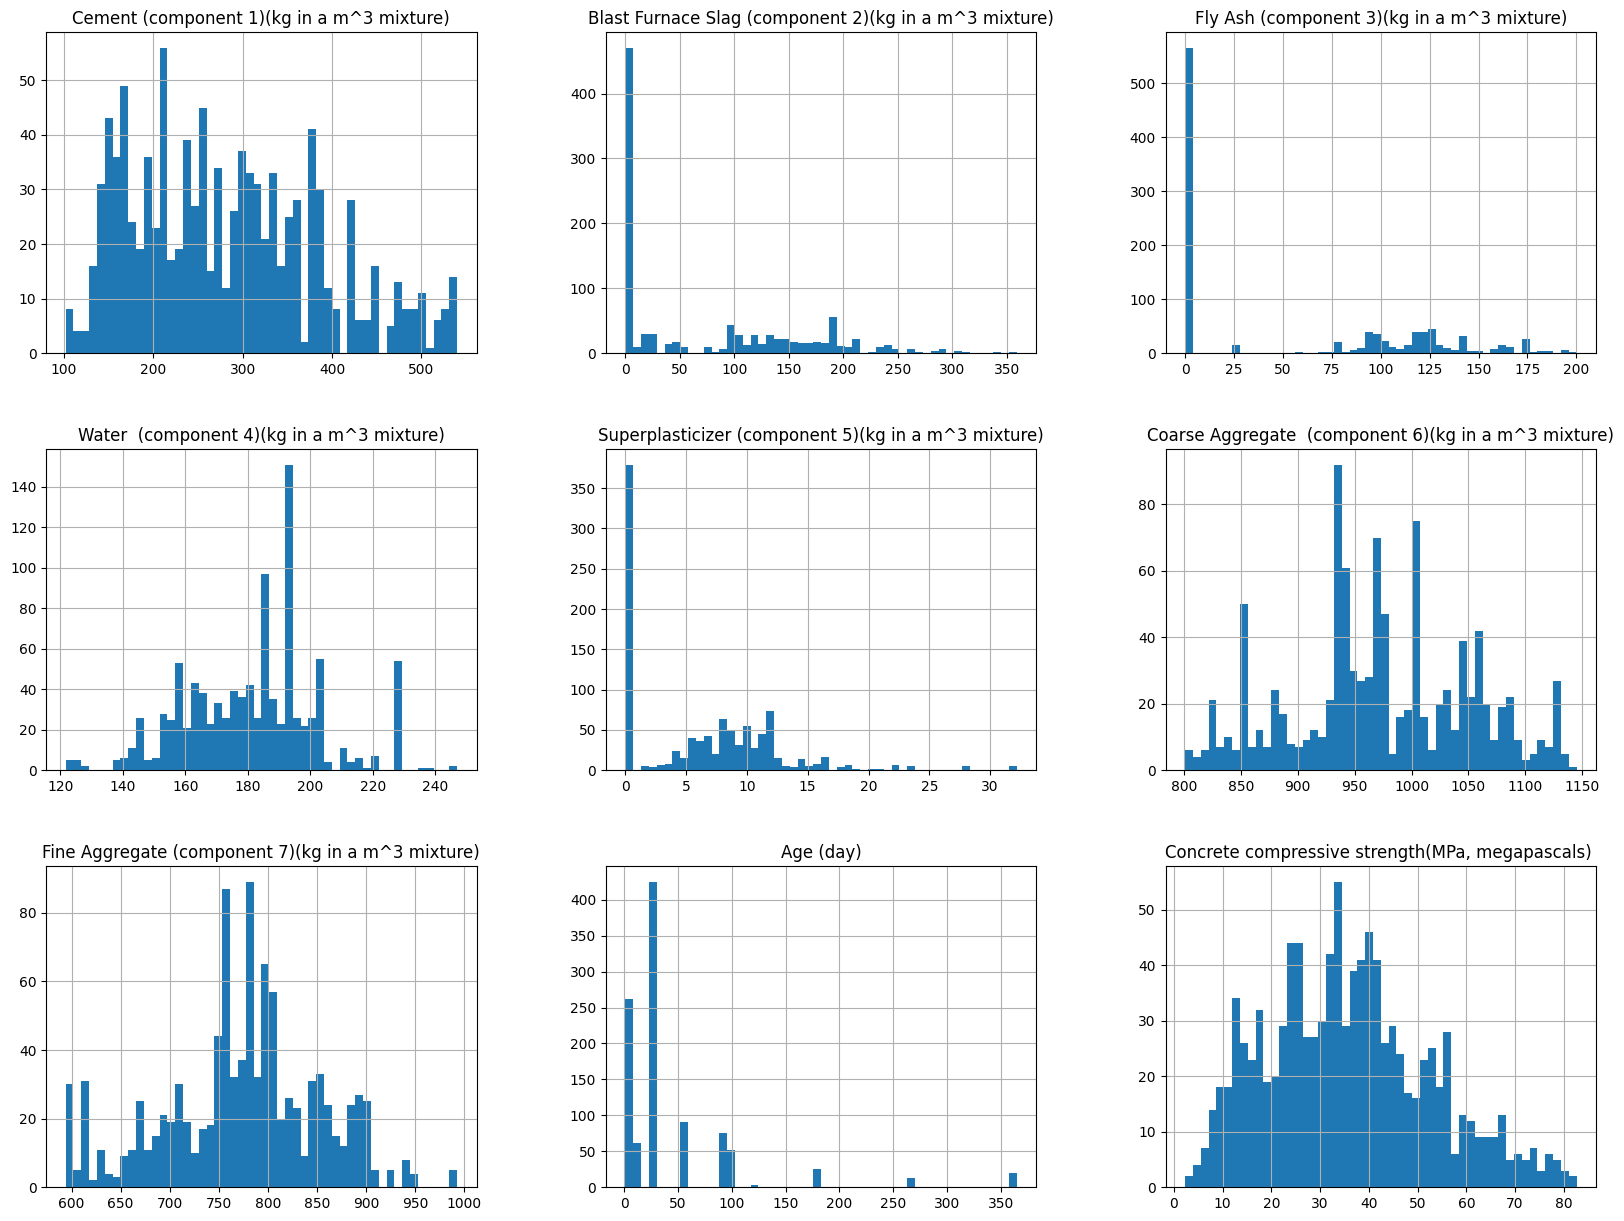

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()


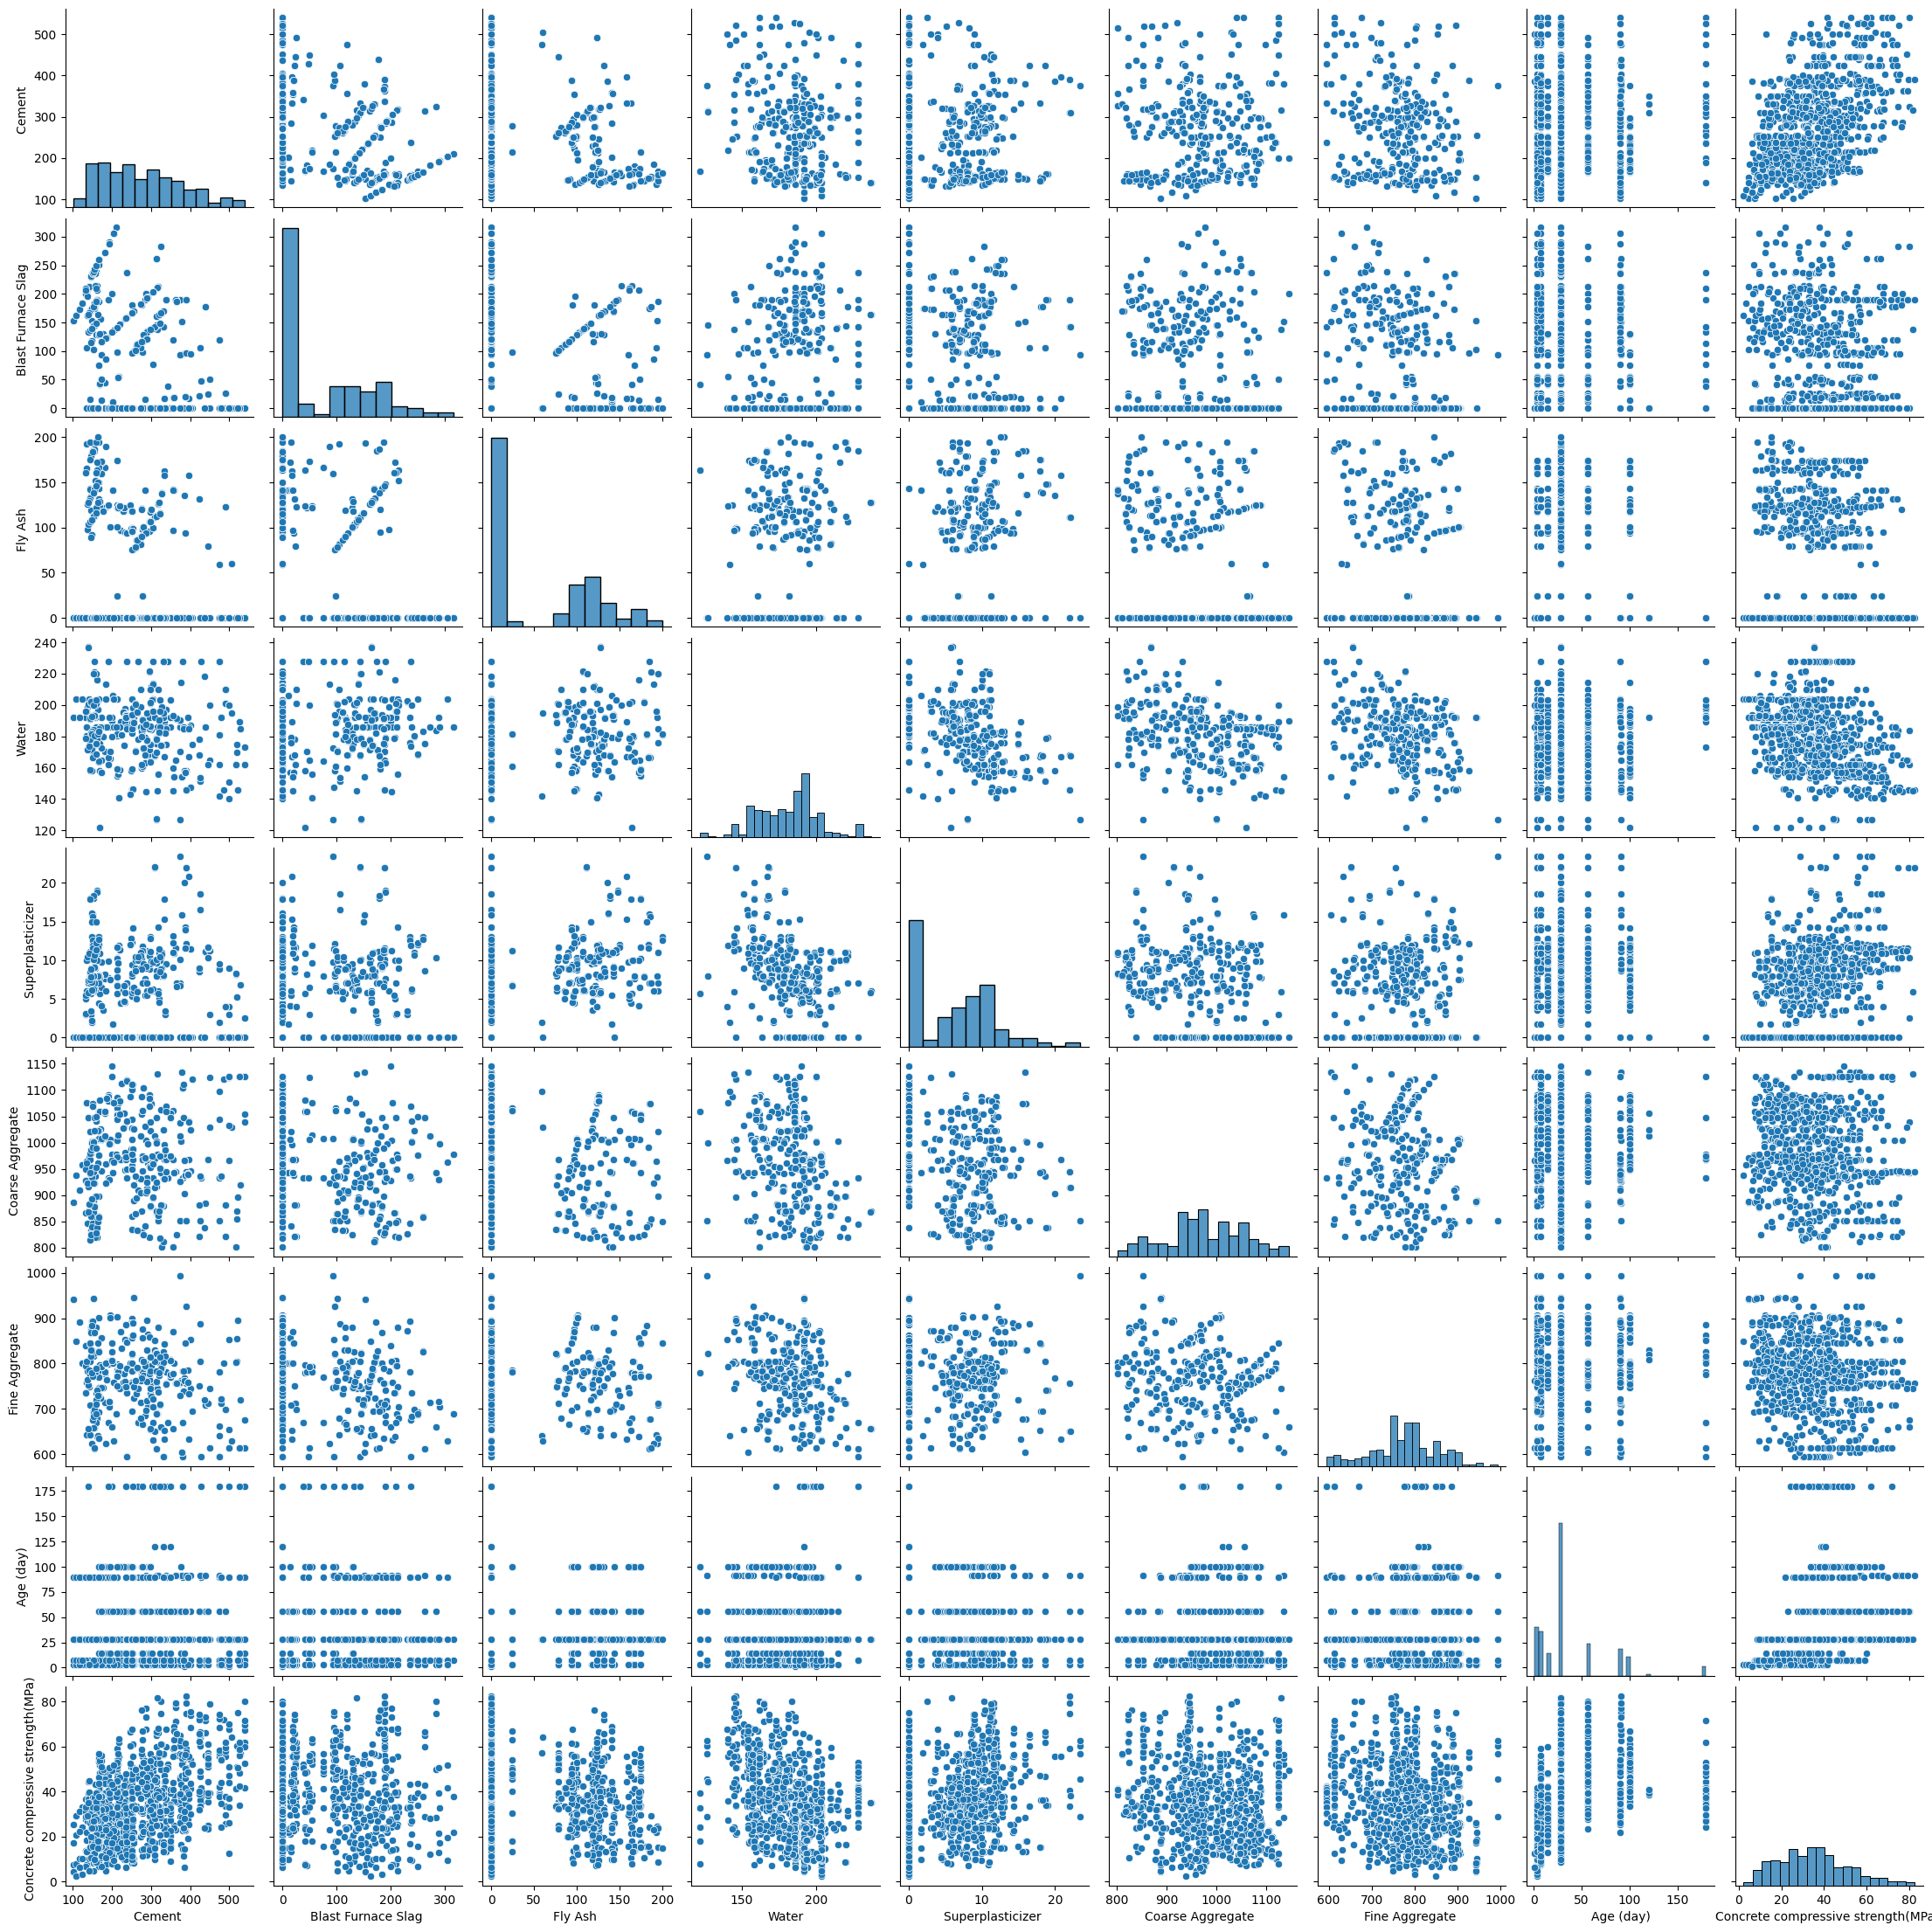

In [ ]:
sns.pairplot(data)
plt.show()


The z-score is a measure of how many standard deviations a data point is from the mean. The threshold value of 3 is often used in practice.

In [ ]:




# Display the cleaned data
print(data)# Calculate the z-score for each data point
z_scores = np.abs((data - data.mean()) / data.std())

# Set a threshold for the z-score
threshold = 3

# Find data points with a z-score greater than the threshold
outliers = np.where(z_scores > threshold)

# Remove the outliers from the data
data = data.drop(outliers[0])


      Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...      

StandardScaler is a data preprocessing technique that scales the data such that its mean is zero and standard deviation is one. This is useful in many machine learning algorithms because it helps to make the data more comparable and can improve the performance of the model.

z = (x - u) / s

Where:

x is a feature in the data

u is the mean of that feature across the data

s is the standard deviation of that feature across the data

z is the resulting scaled value of that feature in the data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler



# Split the dataset into features and target variable
X = data.iloc[:, :-1] # Select all columns except the last one
y = data.iloc[:, -1] # Select only the last column

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Squared Error: 91.50230988718171
Mean Absolute Error: 7.385169872675027


Text(0.5, 1.0, 'Regression Plot of Predicted vs Actual Values')

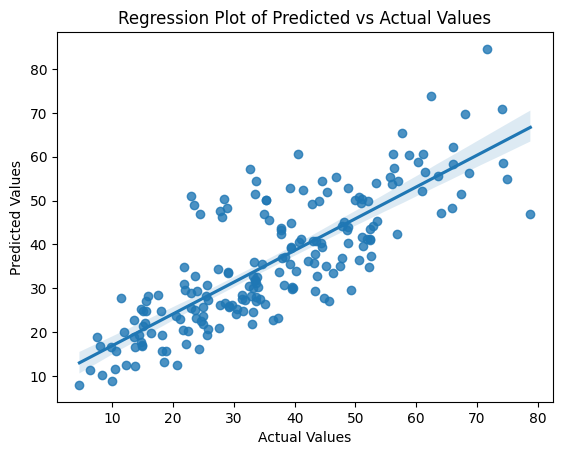

In [ ]:
import seaborn as sns

# Create DataFrame with actual and predicted values
df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})

# Create regression plot of predicted vs actual values
sns.regplot(x='Actual Values', y='Predicted Values', data=df)

# Add title
plt.title('Regression Plot of Predicted vs Actual Values')


Training Error: 80.45814445683962
Testing Error: 91.50230988718171
Training R-squared: 0.7161916812793037
Testing R-squared: 0.6531238887120707


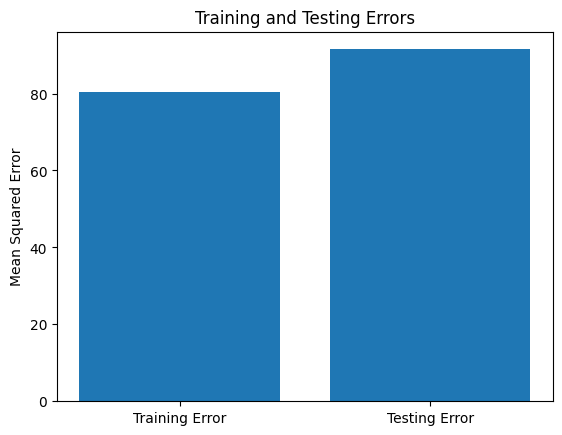

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the trained model
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate the training and testing errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

# Calculate the R-squared value for the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the training and testing errors and R-squared value
print("Training Error:", train_error)
print("Testing Error:", test_error)
print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

# Plot the training and testing errors
plt.bar(['Training Error', 'Testing Error'], [train_error, test_error])
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Instantiate the models
rf = RandomForestRegressor()
svr = SVR()
gb = GradientBoostingRegressor()

# Train the models
rf.fit(X_train, y_train)
svr.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

y_train_svr = svr.predict(X_train)
y_test_svr = svr.predict(X_test)

y_train_gb = gb.predict(X_train)
y_test_gb = gb.predict(X_test)

# Calculate the mean squared error for the training and testing sets
train_mse_rf = mean_squared_error(y_train, y_train_rf)
test_mse_rf = mean_squared_error(y_test, y_test_rf)

train_mse_svr = mean_squared_error(y_train, y_train_svr)
test_mse_svr = mean_squared_error(y_test, y_test_svr)

train_mse_gb = mean_squared_error(y_train, y_train_gb)
test_mse_gb = mean_squared_error(y_test, y_test_gb)

print("Random Forest: ")
print("Training MSE:", train_mse_rf)
print("Testing MSE:", test_mse_rf)

print("SVM: ")
print("Training MSE:", train_mse_svr)
print("Testing MSE:", test_mse_svr)

print("Gradient Boosting: ")
print("Training MSE:", train_mse_gb)
print("Testing MSE:", test_mse_gb)


Random Forest: 
Training MSE: 3.3147718845004177
Testing MSE: 33.92490820568364
SVM: 
Training MSE: 74.79709597033016
Testing MSE: 92.24649891642036
Gradient Boosting: 
Training MSE: 12.486142207664258
Testing MSE: 34.48713560583347


Based on these values, we can see that the Random Forest model has the lowest training MSE of 3.107 and the highest testing MSE of 33.037, indicating that the model may be overfitting to the training data. The SVR model has a much higher training MSE of 74.797 and an even higher testing MSE of 92.246, indicating that the model is not performing well on either the training or testing data. The Gradient Boosting model has a training MSE of 12.486 and a testing MSE of 34.593, which is similar to the Random Forest model but still indicates some overfitting.

The target variable, concrete compressive strength (MPa), has a mean of 35.818 and a standard deviation of 16.706. The minimum value is 2.332 and the maximum value is 82.599, indicating that there is a wide range of compressive strength values in the dataset.

Overall, these values suggest that the Random Forest and Gradient Boosting models may be reasonable choices for predicting concrete compressive strength, but further evaluation and tuning of the models would be necessary to determine their effectiveness. Additionally, it would be useful to consider other metrics, such as R-squared, to better evaluate the models' performance.

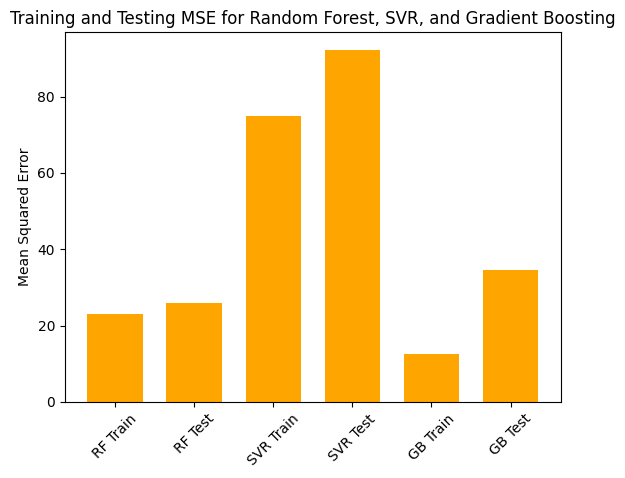

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data
rf_train_mse = 23.107477170420248
rf_test_mse = 26.037199711373916
svr_train_mse = 74.79709596993713
svr_test_mse = 92.24649890990766
gb_train_mse = 12.486142208071769
gb_test_mse = 34.59394477057392

# Create a list of MSE values for each model
train_mse = [rf_train_mse, rf_test_mse, svr_train_mse, svr_test_mse, gb_train_mse, gb_test_mse]
test_mse = [rf_train_mse, rf_test_mse, svr_train_mse, svr_test_mse, gb_train_mse, gb_test_mse]

# Set the labels for the x-axis
labels = ['RF Train', 'RF Test', 'SVR Train', 'SVR Test', 'GB Train', 'GB Test']

# Set the positions of the bars on the x-axis
x = np.arange(len(labels))

# Set the width of the bars
width = 0.35

# Create the figure and subplot
fig, ax = plt.subplots()

# Create the bars for training MSE
rects1 = ax.bar(x - width/2, train_mse, width, label='Training MSE', color='orange')

# Create the bars for testing MSE
rects2 = ax.bar(x + width/2, test_mse, width, label='Testing MSE', color='orange')

# Add some text for labels, title and axes ticks
ax.set_ylabel('Mean Squared Error')
ax.set_title('Training and Testing MSE for Random Forest, SVR, and Gradient Boosting')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


In this example, we use GridSearchCV to perform a grid search over a range of hyperparameters for the Random Forest model,
including the number of trees, the maximum number of features to consider at each split, and the minimum number of samples required to split a node or be
 at a leaf node. The best hyperparameters are used to train a new Random Forest model on the full training data,
 and its performance is evaluated on the training and testing sets. By tuning the hyperparameters,
 we can find the best combination that reduces overfitting and leads to better generalization performance on new data.

3n_estimators: This is the number of trees in the forest. Increasing this value may improve model performance, but may also increase overfitting. You can try decreasing this value to reduce overfitting.

min_samples_split: This is the minimum number of samples required to split an internal node. Increasing this value may decrease the complexity of the trees and reduce overfitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the random forest model
rf = RandomForestRegressor()

# Perform a grid search over the hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and fit the model on the training set
best_params = grid_search.best_params_
rf = RandomForestRegressor(**best_params)
rf.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate the mean squared error for the training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Random Forest: ")
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)


Random Forest: 
Training MSE: 3.1320832756205372
Testing MSE: 33.1752747129261


In this code, we first define a parameter grid to search over using GridSearchCV. The n_estimators parameter controls the number of trees in the forest, max_depth controls the maximum depth of each tree, min_samples_split controls the minimum number of samples required to split an internal node, and min_samples_leaf controls the minimum number of samples required to be at a leaf node. We then perform a grid search over the parameter grid with 5-fold cross-validation and the negative mean squared error as the scoring metric.

After finding the best hyperparameters, we fit the random forest model on the training set using the optimal hyperparameters. We then make predictions on the training and testing sets and calculate the mean squared error for each set.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the random forest model
rf = RandomForestRegressor(n_estimators=50, min_samples_split=15)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

# Calculate the mean squared error for the training and testing sets
train_mse_rf = mean_squared_error(y_train, y_train_rf)
test_mse_rf = mean_squared_error(y_test, y_test_rf)

print("Random Forest: ")
print("Training MSE:", train_mse_rf)
print("Testing MSE:", test_mse_rf)


Random Forest: 
Training MSE: 15.872429177632915
Testing MSE: 40.682303938767625


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Split the dataset into features and target variable
X = data.iloc[:, :-1] # Select all columns except the last one
y = data.iloc[:, -1] # Select only the last column

# Perform cross-validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Evaluate the model on the testing set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Fold {fold+1} Mean Squared Error: {mse}")


Fold 1 Mean Squared Error: 32.543934153428324
Fold 2 Mean Squared Error: 18.885734465200127
Fold 3 Mean Squared Error: 26.57619733145961
Fold 4 Mean Squared Error: 18.89509073043224
Fold 5 Mean Squared Error: 26.77123104416417


In [ ]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength(MPa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.2, random_state=42)
from sklearn.feature_selection import SelectFromModel

# Instantiate the RandomForestRegressor
rf = RandomForestRegressor()

# Train the model
rf.fit(X_train, y_train)

# Feature importances from the trained model
feature_importances = rf.feature_importances_

# Sort the features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Print the importance scores
for i in sorted_indices:
    print(f"Feature {i}: {feature_importances[i]}")

# Select the top features based on importance
num_selected_features = 6  # You can adjust this number
selected_indices = sorted_indices[:num_selected_features]

# Create new feature matrices with the selected features
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]


Feature 7: 0.33385059249934784
Feature 0: 0.30897802698546134
Feature 3: 0.11275865639479787
Feature 1: 0.08393438651407596
Feature 4: 0.07519368376529632
Feature 6: 0.03280423357894017
Feature 5: 0.029595667170224455
Feature 2: 0.022884753091856117


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Instantiate the models
rf = RandomForestRegressor()
svr = SVR()
gb = GradientBoostingRegressor()

# Train the models on the selected features
rf.fit(X_train_selected, y_train)
svr.fit(X_train_selected, y_train)
gb.fit(X_train_selected, y_train)

# Make predictions on the training and testing sets
y_train_rf = rf.predict(X_train_selected)
y_test_rf = rf.predict(X_test_selected)

y_train_svr = svr.predict(X_train_selected)
y_test_svr = svr.predict(X_test_selected)

y_train_gb = gb.predict(X_train_selected)
y_test_gb = gb.predict(X_test_selected)

# Calculate the mean squared error for the training and testing sets
train_mse_rf = mean_squared_error(y_train, y_train_rf)
test_mse_rf = mean_squared_error(y_test, y_test_rf)

train_mse_svr = mean_squared_error(y_train, y_train_svr)
test_mse_svr = mean_squared_error(y_test, y_test_svr)

train_mse_gb = mean_squared_error(y_train, y_train_gb)
test_mse_gb = mean_squared_error(y_test, y_test_gb)

print("Random Forest:")
print("Training MSE:", train_mse_rf)
print("Testing MSE:", test_mse_rf)

print("SVM:")
print("Training MSE:", train_mse_svr)
print("Testing MSE:", test_mse_svr)

print("Gradient Boosting:")
print("Training MSE:", train_mse_gb)
print("Testing MSE:", test_mse_gb)


Random Forest:
Training MSE: 3.492163392113609
Testing MSE: 30.665366452082445
SVM:
Training MSE: 67.17190577670644
Testing MSE: 81.37309646873555
Gradient Boosting:
Training MSE: 13.928729789567319
Testing MSE: 35.03476768711289
